# 库与文件的导入

In [54]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the ev.mat file
data = scipy.io.loadmat('eigenfaces/ev.mat')
eigenfaces = data['eigenfaces'] #99行，128*128列
mean_face = data['mean_face']   #1行，128*128列

# Load the faceR , faceS file
faceR = np.loadtxt('eigenfaces/faceR',dtype=np.float32)     #矩阵形式，2000张图片，每张1个序号，99个线性无关点
faceS = np.loadtxt('eigenfaces/faceS',dtype=np.float32)

# Load the faceDR , faceDS file
with open('eigenfaces/faceDR', 'r') as file:
    face_DR = file.read()
with open('eigenfaces/faceDS', 'r') as file:
    face_DS = file.read()

# train集数据处理

In [55]:
# face_DR = face_DR.splitlines()                             # 多行文本型数据
# print(face_DR)

face_DR_num = re.findall('\d+(?=\s\(_sex)', face_DR)            # 可用的图片标号
face_DR_wrong = re.findall('\d+(?=\s\(_miss)', face_DR)         # 缺失标签值的图片标号
for index, num in enumerate(face_DR_num):                       # enumerate遍历列表，返回索引和文本数据
    face_DR_num[index]=int(face_DR_num[index])                  # 将序号的文本型转为整数型
for index, wrong in enumerate(face_DR_wrong):
    face_DR_wrong[index]=int(wrong)

face_DR_sex = re.findall("(?<=sex\s\s)\w+", face_DR)    # 有效性别标签
face_DR_age = re.findall("(?<=age\s\s)\w+", face_DR)    # 有效年龄标签
face_DR_race = re.findall("(?<=race\s)\w+", face_DR)    # 有效种族标签
face_DR_emo = re.findall("(?<=face\s)\w+", face_DR)    # 有效情感标签
# face_DR_prop = re.findall("(?<=\'\()(\w+|\)|\w+\s\w+)", face_DR)    #有效特殊特征标签
# face_DR_prop = re.findall("(?<=\'\()(\w+|\))", face_DR)
# for index, prop in enumerate(face_DR_prop):
#     if prop == ')':
#         face_DR_prop[index] = '' 


# print("原始数据标签个数 =", len(face_DR_num)+len(face_DR_wrong))

face_DR_data = {'sex':face_DR_sex, 'age':face_DR_age, 'race':face_DR_race, 'emo':face_DR_emo}         # 字典构建的好处是key可以作为分类
face_DR_dataframe = pd.DataFrame(data = face_DR_data, index = face_DR_num)          # 数据和索引分开，构建DataFrame结构

# 经测试发现，2412号、2416图片格式有问题，无法读取
face_DR_dataframe.drop([2412,2416], axis=0, inplace=True)
face_DR_wrong.extend([2412,2416])
face_DR_num.remove(2412)
face_DR_num.remove(2416)

### 训练集数据统计

In [56]:
print('训练集标签如下：','\n',face_DR_dataframe[0:5],'\n')
# print('训练集标签统计如下：','\n',face_DR_dataframe.describe(),'\n')

print("有效标签face_DR_num数量为：", len(face_DR_num))
print("噪声标签face_DR_wrong数量为：", len(face_DR_wrong))
print("噪声样本序号：", face_DR_wrong,'\n')

# DR_sex_count = face_DR_dataframe['sex'].value_counts()
# print(DR_sex_count,'\n')
# DR_age_count = face_DR_dataframe['age'].value_counts()
# print(DR_age_count,'\n')
# DR_race_count = face_DR_dataframe['race'].value_counts()
# print(DR_race_count,'\n')
# DR_emo_count = face_DR_dataframe['emo'].value_counts()
# print(DR_emo_count,'\n')

训练集标签如下： 
        sex    age   race      emo
1223  male  child  white  smiling
1224  male  child  white  serious
1225  male  child  white  smiling
1226  male  child  white  smiling
1227  male  child  white  serious 

有效标签face_DR_num数量为： 1995
噪声标签face_DR_wrong数量为： 5
噪声样本序号： [1228, 1232, 1808, 2412, 2416] 



### train数据数据转换为可使用的矩阵

In [57]:
faceR_dataframe = pd.DataFrame(data = faceR[:,1:], index = list(map(int,list(faceR[:,0]))))
faceR_dataframe.drop(face_DR_wrong, axis=0, inplace=True)
# print(faceR_dataframe[0:5])
face_R = np.array(faceR_dataframe)

### 标签数值化处理

In [58]:
### 性别数据与数值化处理
DR_sex = face_DR_dataframe['sex']
DR_sex_map = DR_sex.map({'male':1, 'female':0})
# np.save('DR_sex.npy',DR_sex)
# np.save('DR_sex_map.npy', DR_sex_map)

### 年龄数据及其数值化处理
DR_age = face_DR_dataframe['age']
DR_age_map = face_DR_dataframe['age'].map({'child':0, 'teen':1, 'adult':2, 'senior':3})
# np.save('DR_age.npy',DR_age)
# np.save('DR_age_map.npy', DR_age_map)

### 表情数据及其数值化处理
# DR_face = face_DR_dataframe['face']
# face_DR_face_map = pd.Series(face_DR_dataframe['face'], index = face_DR_num)
# DR_face_map = face_DR_face_map.map({'smiling':0, 'serious':1, 'funny':2})
# np.save('DR_face.npy',DR_face)
# np.save('DR_face_map.npy', DR_face_map)

# test集数据处理

In [59]:
face_DS_num = re.findall("\d+(?=\s\(_sex)", face_DS)    #可用图片标号
face_DS_wrong = re.findall("\d+(?=\s\(_miss)", face_DS)    #缺失标签值的图片标号
for index, num in enumerate(face_DS_num):
    face_DS_num[index]=int(face_DS_num[index])
for index, wrong in enumerate(face_DS_wrong):
    face_DS_wrong[index]=int(wrong)

face_DS_sex = re.findall("(?<=sex\s\s)\w+", face_DS)    #有效性别标签
face_DS_age = re.findall("(?<=age\s\s)\w+", face_DS)    #有效年龄标签
face_DS_race = re.findall("(?<=race\s)\w+", face_DS)    #有效种族标签
face_DS_emo = re.findall("(?<=face\s)\w+", face_DS)     #有效情感标签
    
# print("原始数据标签个数 =", len(face_DS_num)+len(face_DS_wrong))
    
face_DS_data = {'sex':face_DS_sex, 'age':face_DS_age, 'race':face_DS_race, 'emo':face_DS_emo}
face_DS_dataframe = pd.DataFrame(data = face_DS_data, index = face_DS_num)


### 测试集标签统计

In [60]:
print('测试集标签如下：','\n',face_DS_dataframe[0:5],'\n')
# print('测试集标签统计如下：','\n',face_DS_dataframe.describe(),'\n')
    
print("有效标签face_DR_num数量为：", len(face_DS_num))
print("噪声标签face_DR_wrong数量为：", len(face_DS_wrong))
print("噪声样本序号：", face_DS_wrong,'\n')

# DS_sex_count = face_DS_dataframe['sex'].value_counts()
# print(DS_sex_count,'\n')
# DS_age_count = face_DS_dataframe['age'].value_counts()
# print(DS_age_count,'\n')
# DS_race_count = face_DS_dataframe['race'].value_counts()
# print(DS_race_count,'\n')
# DS_face_count = face_DS_dataframe['face'].value_counts()
# print(DS_face_count,'\n')

测试集标签如下： 
          sex     age   race      emo
3223  female  senior  black  smiling
3224  female   adult  black  smiling
3225    male  senior  white  smiling
3226    male  senior  white  serious
3227    male  senior  white  serious 

有效标签face_DR_num数量为： 1996
噪声标签face_DR_wrong数量为： 4
噪声样本序号： [4056, 4135, 4136, 5004] 



### test集数据转换为可使用的矩阵

In [61]:
faceS_dataframe = pd.DataFrame(data = faceS[:,1:], index = list(map(int,list(faceS[:,0]))))
faceS_dataframe.drop(face_DS_wrong, axis=0, inplace=True)
# print(faceS_dataframe[0:5])
face_S = np.array(faceS_dataframe)

### 标签数值化处理

In [62]:
# 性别数据及其数值化处理
DS_sex = face_DS_dataframe['sex']           # 框架中取出某列，是以这列的series类型返回，索引不算作返回值
DS_sex_map = DS_sex.map({'male':1, 'female':0})         # Series数据类型也能当作目标变量
# np.save('DS_sex.npy', np.array(DS_sex))
# np.save('DS_sex_map.npy', DS_sex_map)

### 年龄数据及其数值化处理
DS_age = face_DS_dataframe['age']
DS_age_map = face_DS_dataframe['age'].map({'child':0, 'teen':1, 'adult':2, 'senior':3})
# np.save('DS_age.npy',DS_age)
# np.save('DS_age_map.npy', DS_age_map)

### 表情数据及其数值化处理
# DS_face = face_DS_dataframe['face']
# face_DS_face_map = pd.Series(face_DS_dataframe['face'], index = face_DS_num)
# DS_face_map = face_DS_face_map.map({'smiling':0, 'serious':1, 'funny':2})
# np.save('DS_face.npy',DS_face)
# np.save('DS_face_map.npy', DS_face_map)

# 将 train集 和 test集 标准化

In [63]:
from sklearn.preprocessing import StandardScaler    #数据标准化
SD = StandardScaler()
SD.fit(face_R)
train_std = SD.transform(face_R)
test_std = SD.transform(face_S)

# 支持向量机

### 模型训练

In [64]:
from sklearn.svm import SVC  #支持向量机

clf_SVM = SVC(kernel='rbf' , C=100 , gamma=1e-3)
clf_SVM.fit(train_std, DR_sex_map)
predict_svm = clf_SVM.predict(test_std)

### 评估验证

In [65]:
# 可用矩阵face_R、face_S，标准化后数据train_std、test_std，训练标签值DR_sex_map、DR_age_map，测试集标签值DS_sex_map、DS_age_map，模型预测值predict_svm
# 训练数据与训练标签进行模型训练，将测试数据进行预测，再与测试集标签进行比较
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, classification_report

accuracy = accuracy_score(DS_sex_map, predict_svm)
precision = precision_score(DS_sex_map, predict_svm, average='weighted')
recall = recall_score(DS_sex_map, predict_svm, average='weighted')
f1 = f1_score(DS_sex_map, predict_svm, average='weighted')
result_svm = {'precision':precision , 'accuracy':accuracy , 'f1':f1 , 'recall':recall}

print("查准率 :", round(result_svm['precision'],4))
print("准确率 :", round(result_svm['accuracy'],4))
print("召回率 :", round(result_svm['recall'], 4))
print("F1分值 :", round(result_svm['f1'],4))

# # 查看是否过拟合
# print('训练集拟合程度score : {:.4f}'.format(clf_SVM1.score(train_std, DR_sex_map)))
# print('测试集拟合程度score : {:.4f}'.format(clf_SVM1.score(test_std, DS_sex_map)))

# 分类报告
print(classification_report(DS_sex_map, predict_svm))

查准率 : 0.7169
准确率 : 0.7239
召回率 : 0.7239
F1分值 : 0.7178
              precision    recall  f1-score   support

           0       0.64      0.54      0.58       719
           1       0.76      0.83      0.79      1277

    accuracy                           0.72      1996
   macro avg       0.70      0.68      0.69      1996
weighted avg       0.72      0.72      0.72      1996



### 网格搜索法调参

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation 给带有高斯核的SVM分类器提供参数
rbf_para = [{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma' : [1e-1, 1e-2, 1e-3, 1e-4]}]
rbf_scores = ['precision']

for score in rbf_scores:
    print("高斯核SVM超参调节的评估标准为 %s" % score)

# 训练一个带有最优参数的SVM模型
    rbfclf = GridSearchCV(
        SVC(), rbf_para, scoring='%s' % score
    )
    rbfclf.fit(train_std, DR_sex_map)

    print("最佳参数为:", rbfclf.best_params_ ,'\n')

    means = rbfclf.cv_results_['mean_test_score']
    stds = rbfclf.cv_results_['std_test_score']
    # print("在搜索范围内，对应参数的分类准确度如下：")
    # for mean, std, params in zip(means, stds, rbfclf.cv_results_['params']):
    #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
    rbfclf_sex_pred = rbfclf.predict(test_std)
    print(classification_report(DS_sex_map, rbfclf_sex_pred))

高斯核SVM超参调节的评估标准为 precision
最佳参数为: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} 

              precision    recall  f1-score   support

           0       0.64      0.54      0.58       719
           1       0.76      0.83      0.79      1277

    accuracy                           0.72      1996
   macro avg       0.70      0.68      0.69      1996
weighted avg       0.72      0.72      0.72      1996



# K-fold交叉验证

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC  #支持向量机

all_std = np.vstack((train_std , test_std))

# 一行或一列数据转为矩阵默认是一维行矩阵，如需要列合并，转为多行一列的二维矩阵(列向量)
all_sex_map = np.hstack((DR_sex_map , DS_sex_map))
# all_sex_map = np.vstack((np.array(DR_sex_map).reshape(-1,1),np.array(DS_sex_map).reshape(-1,1)))
# # 二维矩阵展平成一维矩阵才能训练
# all_sex_map_ravel = np.ravel(all_sex_map)
# all_sex_map_fla = all_sex_map.flatten()

score_svm = cross_val_score(clf_SVM , all_std , all_sex_map , scoring='precision' , cv=5)
print(score_svm)
print(score_svm.mean())

[0.85053381 0.85515873 0.81730769 0.63084112 0.80079681]
0.790927632907987


# PCA特征提取

### 图片读取

In [68]:

train = []
for img in face_DR_num:
    with open('rawdata\\' + str(img), 'rb') as fid:
        I = np.fromfile(fid, dtype=np.uint8)    #用矩阵方式打开
        train.append(I.reshape(1, -1).flatten().tolist())

test = []
for img in face_DS_num:
    with open('rawdata\\' + str(img), 'rb') as fid:
        I = np.fromfile(fid, dtype=np.uint8)    #用矩阵方式打开
        test.append(I.reshape(1, -1).flatten().tolist())

train_arr = np.array(train)
test_arr = np.array(test)

### pca降维

In [69]:
from sklearn.decomposition import PCA    # 导入PCA模型

pca = PCA(n_components = 100)            # 将PCA模型赋给变量pca，并设置模型的参数n_components为100，即将这1024个特征进行线性组合，生成互不相关的100个新特征
pca.fit(train_arr)                       # 使用训练集的特征数据拟合PCA模型。

train_pca = pca.transform(train_arr)   # 使用拟合好的PCA模型对训练集的特征数据进行降维
test_pca = pca.transform(test_arr)     # 使用拟合好的PCA模型对测试集的特征数据进行降维


### 标准化

In [70]:
from sklearn.preprocessing import StandardScaler    #数据标准化
SD = StandardScaler()
SD.fit(train_pca)
train_pca_std = SD.transform(train_pca)
test_pca_std = SD.transform(test_pca)

# KNN模型分类器

### 模型训练

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_pca_std, DR_age_map)
predict_knn = knn.predict(test_pca_std)

### knn评估

In [72]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, mean_squared_error, classification_report

accuracy = accuracy_score(DS_age_map, predict_knn)
precision = precision_score(DS_age_map, predict_knn, average='weighted')
recall = recall_score(DS_age_map, predict_knn, average='weighted')
f1 = f1_score(DS_age_map, predict_knn, average='weighted')
result_knn = {'precision':precision , 'accuracy':accuracy , 'f1':f1 , 'recall':recall}

print("查准率 :", round(result_knn['precision'],4))
print("准确率 :", round(result_knn['accuracy'],4))
print("召回率 :", round(result_svm['recall'], 4))
print("F1分值 :", round(result_knn['f1'],4))
print("均方根误差 :", mean_squared_error(DS_age_map, predict_knn))

print(classification_report(DS_age_map, predict_knn))

查准率 : 0.8056
准确率 : 0.7625
召回率 : 0.7239
F1分值 : 0.7805
均方根误差 : 0.4278557114228457
              precision    recall  f1-score   support

           0       0.15      0.15      0.15        68
           1       0.09      0.25      0.14        83
           2       0.89      0.85      0.87      1730
           3       0.39      0.21      0.27       115

    accuracy                           0.76      1996
   macro avg       0.38      0.36      0.36      1996
weighted avg       0.81      0.76      0.78      1996



# 图片显示

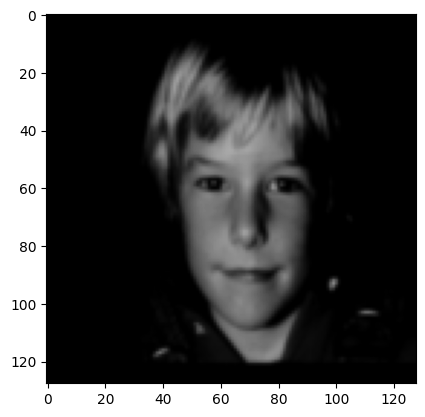

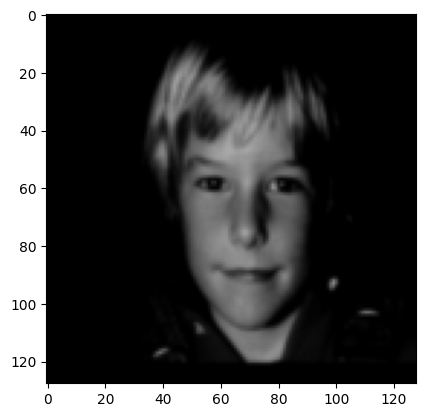

In [73]:
# Perform calculations
i = np.matmul(eigenfaces.T, faceR[4, 1:100].T) + mean_face

# Display the image
plt.imshow(i.reshape(128, 128), cmap='gray', vmin=0, vmax=255)    #对标colormap
plt.show()                                                        #对标imagesc

with open('rawdata/1227', 'rb') as fid:
    I = np.fromfile(fid, dtype=np.uint8)    #用矩阵方式打开

plt.imshow(I.reshape((128, 128)), cmap='gray', vmin=0, vmax=255)
plt.show()